<a href="https://colab.research.google.com/github/drkaushiksarkar/CNN_Skin_Cancer/blob/main/kaushik_sarkar_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [ ]:
import pathlib
#import pandas as pd
from glob import glob
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [ ]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [ ]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train, 
    batch_size=batch_size, 
    label_mode="categorical",
    image_size=(img_height, img_width), 
    seed=123, 
    validation_split=0.2, 
    subset='training'
    )

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [ ]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train, 
    batch_size=batch_size, 
    label_mode="categorical",
    image_size=(img_height, img_width), 
    seed=123, 
    validation_split=0.2, 
    subset='validation'
    )

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [ ]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

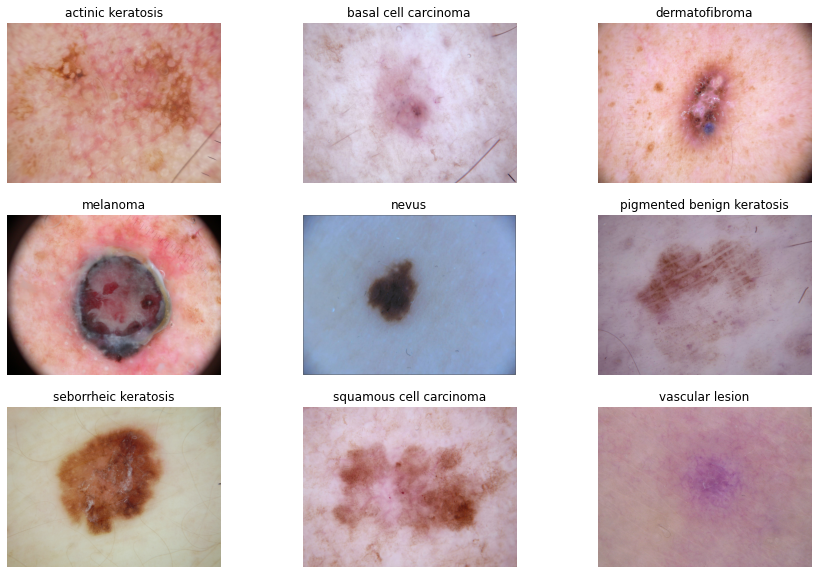

In [ ]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize

plt.figure(figsize=(15, 10))

for i, class_ in enumerate(list(class_names)):
    plt.subplot(3, 3, i+1)
    data_path = os.path.join(str(data_dir_train), class_)
    file_path = glob(os.path.join(data_path,'*.jpg'))[0]
    img = PIL.Image.open(file_path)
    plt.imshow(img)
    plt.title(class_)
    plt.axis("off")
plt.show()

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [ ]:
### Your code goes here

def cnn_model(height, width, num_channels, num_classes, loss='categorical_crossentropy', metrics=['accuracy']):
  batch_size = 32
  model = Sequential()
  model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(height, width, num_channels))),
  model.add(keras.layers.Conv2D(filters = 64, kernel_size = (5,5), padding = 'Same', activation ='relu', 
                   batch_input_shape = (batch_size, height, width, num_channels)))
  model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
  model.add(keras.layers.Conv2D(filters = 128, kernel_size = (3,3), activation ='relu'))
  model.add(keras.layers.Conv2D(filters = 128, kernel_size = (3,3), activation ='relu'))
  model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
  model.add(keras.layers.Conv2D(filters = 256, kernel_size = (3,3), activation ='relu'))
  model.add(keras.layers.Conv2D(filters = 256, kernel_size = (3,3), activation ='relu'))
  model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
  model.add(keras.layers.Conv2D(filters = 512, kernel_size = (3,3), activation ='relu'))
  model.add(keras.layers.Conv2D(filters = 512, kernel_size = (3,3), activation ='relu'))
  model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
  model.add(keras.layers.Conv2D(filters = 256, kernel_size = (3,3), activation ='relu'))
  model.add(keras.layers.Conv2D(filters = 256, kernel_size = (3,3), activation ='relu'))
  model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
  model.add(keras.layers.Flatten()),
  model.add(keras.layers.Dense(256, activation="relu")),
  model.add(keras.layers.Dense(128, activation="relu")),
  model.add(keras.layers.Dense(num_classes, activation="softmax"))
  return model

model = cnn_model(180,180,3,9)

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [ ]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 64)      4864      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 88, 88, 128)       73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 86, 86, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 128)      0         
 2D)                                                    

### Train the model

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 168s 634ms/step - loss: 2.0692 - accuracy: 0.1908 - val_loss: 2.0453 - val_accuracy: 0.1924
Epoch 2/20
56/56 [==============================] - 5s 87ms/step - loss: 2.0308 - accuracy: 0.2215 - val_loss: 1.9811 - val_accuracy: 0.1969
Epoch 3/20
56/56 [==============================] - 5s 87ms/step - loss: 1.8926 - accuracy: 0.2874 - val_loss: 1.9974 - val_accuracy: 0.2975
Epoch 4/20
56/56 [==============================] - 5s 87ms/step - loss: 1.7716 - accuracy: 0.3298 - val_loss: 1.6928 - val_accuracy: 0.3602
Epoch 5/20
56/56 [==============================] - 5s 87ms/step - loss: 1.6982 - accuracy: 0.3756 - val_loss: 1.5576 - val_accuracy: 0.4452
Epoch 6/20
56/56 [==============================] - 5s 87ms/step - loss: 1.6241 - accuracy: 0.4135 - val_loss: 1.6052 - val_accuracy: 0.4116
Epoch 7/20
56/56 [==============================] - 5s 87ms/step - loss: 1.6028 - accuracy: 0.4157 - val_loss: 1.6320 - val_accuracy: 0.4116
Epoch 8/20

### Visualizing training results

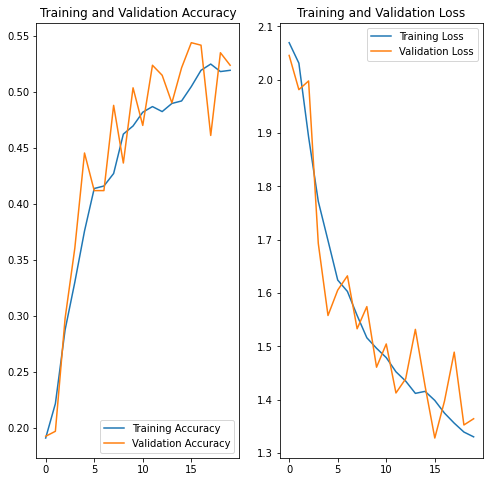

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

I got 52% validation accuracy, but the model has a tendency to overfit although I used two decay hyperparameters rho and decay.

### Write your findings here

In [ ]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

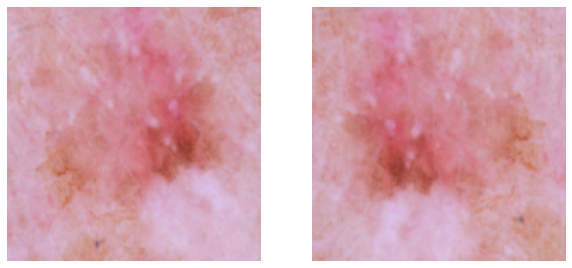

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(2):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(1, 2, i + 1)
    plt.imshow(images[0].numpy().astype("uint8"))
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

def cnn_model(height, width, num_channels, num_classes, loss='categorical_crossentropy', metrics=['accuracy']):
  batch_size = 32
  model = Sequential()
  model.add(data_augmentation)
  model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(height, width, num_channels))),
  model.add(keras.layers.Conv2D(filters = 64, kernel_size = (5,5), padding = 'Same', activation ='relu', 
                   batch_input_shape = (batch_size, height, width, num_channels)))
  model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
  model.add(keras.layers.Conv2D(filters = 128, kernel_size = (3,3), activation ='relu'))
  model.add(keras.layers.Conv2D(filters = 128, kernel_size = (3,3), activation ='relu'))
  model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
  model.add(keras.layers.Conv2D(filters = 256, kernel_size = (3,3), activation ='relu'))
  model.add(keras.layers.Conv2D(filters = 256, kernel_size = (3,3), activation ='relu'))
  model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
  model.add(keras.layers.Conv2D(filters = 512, kernel_size = (3,3), activation ='relu'))
  model.add(keras.layers.Conv2D(filters = 512, kernel_size = (3,3), activation ='relu'))
  model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
  model.add(keras.layers.Conv2D(filters = 256, kernel_size = (3,3), activation ='relu'))
  model.add(keras.layers.Conv2D(filters = 256, kernel_size = (3,3), activation ='relu'))
  model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
  model.add(keras.layers.Flatten()),
  model.add(keras.layers.Dense(256, activation="relu")),
  model.add(keras.layers.Dropout(0.5)),
  model.add(keras.layers.Dense(128, activation="relu")),
  model.add(keras.layers.Dropout(0.5)),
  model.add(keras.layers.Dense(num_classes, activation="softmax"))
  return model

model_2 = cnn_model(180,180,3,9)

### Compiling the model

In [ ]:
## Your code goes here
model_2.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.0001, rho=0.9, epsilon=1e-08, decay=1e-6), #I have added decay parameters to address overfit tendency and improve stability
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Training the model

In [ ]:
## Your code goes here, note: train your model for 20 epochs
history = model_2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 7s 93ms/step - loss: 2.1256 - accuracy: 0.1696 - val_loss: 2.0639 - val_accuracy: 0.1924
Epoch 2/20
56/56 [==============================] - 5s 90ms/step - loss: 2.0490 - accuracy: 0.2243 - val_loss: 2.0263 - val_accuracy: 0.2215
Epoch 3/20
56/56 [==============================] - 5s 90ms/step - loss: 1.9813 - accuracy: 0.2556 - val_loss: 1.9132 - val_accuracy: 0.2617
Epoch 4/20
56/56 [==============================] - 5s 89ms/step - loss: 1.9400 - accuracy: 0.2807 - val_loss: 1.8173 - val_accuracy: 0.3333
Epoch 5/20
56/56 [==============================] - 5s 89ms/step - loss: 1.9184 - accuracy: 0.2885 - val_loss: 1.8489 - val_accuracy: 0.3199
Epoch 6/20
56/56 [==============================] - 5s 89ms/step - loss: 1.8683 - accuracy: 0.3108 - val_loss: 1.7682 - val_accuracy: 0.3378
Epoch 7/20
56/56 [==============================] - 5s 89ms/step - loss: 1.8424 - accuracy: 0.3203 - val_loss: 1.7290 - val_accuracy: 0.3781
Epoch 8/20
56

### Visualizing the results

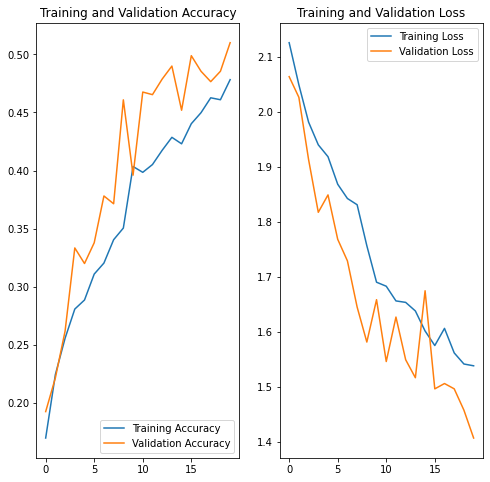

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Although I did not achieve a higher accuracy from the plot it is evident that the overfitting tendency has reduced. Therefore, if I continue training for more epochs there are chances of better accuracy.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [ ]:
original_path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
original_lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
original_dataframe_dict = dict(zip(original_path_list, original_lesion_list))
original_df = pd.DataFrame(list(original_dataframe_dict.items()),columns = ['Path','Label'])

In [ ]:
original_df.head()

,Path,Label
0,/content/gdrive/MyDrive/Skin cancer ISIC The I...,melanoma
1,/content/gdrive/MyDrive/Skin cancer ISIC The I...,melanoma
2,/content/gdrive/MyDrive/Skin cancer ISIC The I...,melanoma
3,/content/gdrive/MyDrive/Skin cancer ISIC The I...,melanoma
4,/content/gdrive/MyDrive/Skin cancer ISIC The I...,melanoma


In [ ]:
original_df['Label'].value_counts()

pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
Name: Label, dtype: int64

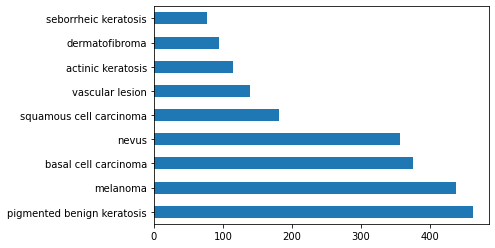

In [ ]:
original_df['Label'].value_counts()[:20].plot(kind='barh')

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples? seborrheic keratosis 
#### - Which classes dominate the data in terms proportionate number of samples? pigmented benign keratosis, melanoma, basal cell carcinoma, nevus


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [ ]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [ ]:
path_to_training_dataset=data_dir_train
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(str(path_to_training_dataset) + "/" + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F9EA18F7690>: 100%|██████████| 500/500 [00:05<00:00, 92.57 Samples/s] 


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F9EA195E090>: 100%|██████████| 500/500 [00:05<00:00, 91.32 Samples/s] 


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F9EA18CF550>: 100%|██████████| 500/500 [00:06<00:00, 81.71 Samples/s] 


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x7F9EA194D710>: 100%|██████████| 500/500 [00:26<00:00, 18.96 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F9EA18F7490>: 100%|██████████| 500/500 [00:20<00:00, 24.29 Samples/s] 


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F9EA1895D90>: 100%|██████████| 500/500 [00:05<00:00, 90.72 Samples/s] 


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F9EA1853C50>: 100%|██████████| 500/500 [00:10<00:00, 46.43 Samples/s] 


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F9E9C5C3B10>: 100%|██████████| 500/500 [00:05<00:00, 88.30 Samples/s] 


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F9EA190B150>: 100%|██████████| 500/500 [00:05<00:00, 93.91 Samples/s] 


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [ ]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0010313.jpg_21112cea-cd10-4ad7-9c0b-7f531ec5e482.jpg',
 '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0010171.jpg_8ee02393-1aea-454c-a1ab-1fed02707b2d.jpg',
 '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0010587.jpg_45389711-567a-4c2e-9a1a-86bc9d76f2d9.jpg',
 '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0000484.jpg_b8db91ec-2bb0-4dd1-a177-d3a0f85aae72.jpg',
 '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output/melanoma_original_ISIC_0000304.jpg_493ca433-d889-454e-980c-6a51ae2e1a07.jpg',
 '/content/gdrive/MyDrive/Skin cancer ISIC The International

In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',

In [ ]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [ ]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [ ]:
df2

,Path,Label
0,/content/gdrive/MyDrive/Skin cancer ISIC The I...,melanoma
1,/content/gdrive/MyDrive/Skin cancer ISIC The I...,melanoma
2,/content/gdrive/MyDrive/Skin cancer ISIC The I...,melanoma
3,/content/gdrive/MyDrive/Skin cancer ISIC The I...,melanoma
4,/content/gdrive/MyDrive/Skin cancer ISIC The I...,melanoma
...,...,...
4495,/content/gdrive/MyDrive/Skin cancer ISIC The I...,seborrheic keratosis
4496,/content/gdrive/MyDrive/Skin cancer ISIC The I...,seborrheic keratosis
4497,/content/gdrive/MyDrive/Skin cancer ISIC The I...,seborrheic keratosis
4498,/content/gdrive/MyDrive/Skin cancer ISIC The I...,seborrheic keratosis


In [ ]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train, 
    batch_size=batch_size, 
    label_mode="categorical",
    image_size=(img_height, img_width), 
    seed=123, 
    validation_split=0.2, 
    subset='training'
    )

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [ ]:
data_dir_train= pathlib.Path("/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
## your code goes here
def cnn_model(height, width, num_channels, num_classes):
  batch_size = 32
  model = Sequential()
  model.add(data_augmentation)
  model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(height, width, num_channels))),
  model.add(keras.layers.Conv2D(filters = 64, kernel_size = (5,5), padding = 'Same', activation ='relu', 
                   batch_input_shape = (batch_size, height, width, num_channels)))
  model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
  model.add(keras.layers.Conv2D(filters = 128, kernel_size = (3,3), activation ='relu'))
  model.add(keras.layers.Conv2D(filters = 128, kernel_size = (3,3), activation ='relu'))
  model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
  model.add(keras.layers.Conv2D(filters = 256, kernel_size = (3,3), activation ='relu'))
  model.add(keras.layers.Conv2D(filters = 256, kernel_size = (3,3), activation ='relu'))
  model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
  model.add(keras.layers.Conv2D(filters = 512, kernel_size = (3,3), activation ='relu'))
  model.add(keras.layers.Conv2D(filters = 512, kernel_size = (3,3), activation ='relu'))
  model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
  model.add(keras.layers.Conv2D(filters = 256, kernel_size = (3,3), activation ='relu'))
  model.add(keras.layers.Conv2D(filters = 256, kernel_size = (3,3), activation ='relu'))
  model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
  model.add(keras.layers.Flatten()),
  model.add(keras.layers.Dense(256, activation="relu")),
  model.add(keras.layers.Dropout(0.5)),
  model.add(keras.layers.Dense(128, activation="relu")),
  model.add(keras.layers.Dropout(0.5)),
  model.add(keras.layers.Dense(num_classes, activation="softmax"))
  return model

model_3 = cnn_model(180,180,3,9)

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [ ]:
## your code goes here
model_3.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.0001, rho=0.9, epsilon=1e-08, decay=1e-6),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [ ]:
epochs = 50
## Your code goes here, use 50 epochs.
history = model_3.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


169/169 [==============================] - 28s 103ms/step - loss: 2.1612 - accuracy: 0.1469 - val_loss: 2.0673 - val_accuracy: 0.2242
Epoch 2/50
169/169 [==============================] - 15s 88ms/step - loss: 2.0176 - accuracy: 0.2207 - val_loss: 1.7853 - val_accuracy: 0.3348
Epoch 3/50
169/169 [==============================] - 15s 89ms/step - loss: 1.8684 - accuracy: 0.2719 - val_loss: 1.7003 - val_accuracy: 0.3051
Epoch 4/50
169/169 [==============================] - 15s 89ms/step - loss: 1.7996 - accuracy: 0.2958 - val_loss: 1.6256 - val_accuracy: 0.3816
Epoch 5/50
169/169 [==============================] - 15s 88ms/step - loss: 1.7528 - accuracy: 0.3149 - val_loss: 1.5972 - val_accuracy: 0.3987
Epoch 6/50
169/169 [==============================] - 15s 88ms/step - loss: 1.7057 - accuracy: 0.3409 - val_loss: 1.5540 - val_accuracy: 0.4061
Epoch 7/50
169/169 [==============================] - 15s 88ms/step - loss: 1.6570 - accuracy: 0.3509 - val_loss: 1.5593 - val_accuracy: 0.3890
Ep

#### **Todo:**  Visualize the model results

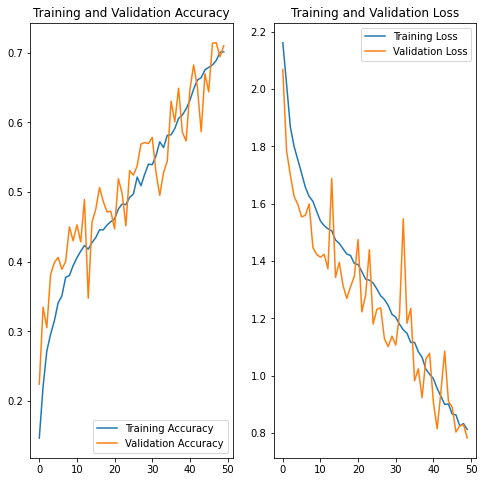

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



I have got rid of overfitting. At the same time, the accuracy has improved significantly to over 70% with validation accuracy still increasing. Before class imbalance was limiting both training and validation accuracy and the accuracy was not improving. Now with adequate image data for each class, there is steady improvement and with longer training, the model can improve further. One of the critical factors to consider here is that when nearly 50% classes of a dataset are correctly predicted due to availability of adequate data, the model accuracy will remain low simply because the accuracy for predominant classes can be high, but minority classes have low accuracy. As a result the model fails to detect those classes and missclassification happens. With balnced class, this challenge is overcome and the model can have similar accuracy in detecting the minority classes. So, class imbalance helps and I found the same instance here.